In [885]:
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

In [886]:
df_ive_cat = pd.read_csv("ive_catalunya.csv", sep=";")
df_mujeres = pd.read_csv("mujeres_intencion_3años.csv", sep=";", encoding="latin1")
t5 = pd.read_csv("aborto_metodo.csv", sep=";")#OK3
t6 = pd.read_csv("aborto_edad.csv", sep=";")#OK3
t7 = pd.read_csv("aborto_motivo.csv", sep=";")#OK3
t8 = pd.read_csv("aborto_gestacion.csv", sep=";")#OK3

## Datasets de Interrupcion voluntario de embarazo en Cataluña (IVE)

db_ive_cat =>>>> catalunya: Preguntas.....
. Any: Desde el 2007 a 2022
. método: Cuales son los metodos mas utilizado por año 
. grupo de edad: Evolucion por año 
                . Si tiene pareja o no 
                . Si tiene hijos o no 
. residencia(nacionalidad): Cuales son las nacionalidades que mas abortas? 
situacion laboral: si influye si esta trabajando o no para que tienden por grupo de edad 
.estado civil
.fills a carrec
. fill vius
mujeres que han abortado que tienen hijos pero no estan a su cargo. 
influye la situacion laboral en mujeres para que aborten y si tienen o no pareja quiero ver si es posible hacer una correlacion al respecto 
Cifra por año y tipo de métodos y motivo 
Causas( que influye) correlacionar de la edad de causas 
Cuál es el método más utilizado 
Explicar los tipos de métodos 
Especificar 
Las personas que trabajan y qué edades 
Las mujeres que tienen hijo por edad y las que no pero todo por edades
Cuáles son las que más aborta las extranjera o españolas 
Lo de la gestación cuantos casos por gestación hay 


In [887]:
df_ive_cat["ingressos"] = df_ive_cat["ingressos"].replace(
    {"No hi consta": "No"})

In [888]:
df_ive_cat["situació laboral"] = df_ive_cat["situació laboral"].replace(
    {"Aturada o a la recerca de la primera feina remunerada": "Aturada", "Altres": "No hi consta"}
)

In [889]:
df_ive_cat = df_ive_cat.rename(columns={'tipus de centre': 'centres', 'situació de convivència': 'estat civil', 'país de residència': 'residència'
                                        , 'nom de la comarca de residència': 'comarca'})

In [890]:
df_ive_cat["mètode"] = df_ive_cat["mètode"].replace(
    {"Altres": "No hi consta"}
)

In [891]:
df_ive_cat["estat civil"] = df_ive_cat["estat civil"].replace(
    {"No hi consta" : "Amb altres persones"}
)

In [892]:
df_ive_cat["mètode"] = df_ive_cat["mètode"].replace({'Tractament farmacològic (Mifepristona+Misprostol)': 'Mifepristona+Misprostol', 'Fracàs TF + dilatació + aspiració / evacuació / raspament': 'raspament', 'Dilatació i raspament de l’úter': 'Dilatació i raspament'})

In [893]:
df_ive_cat["grup d'edat"] = (
    df_ive_cat["grup d'edat"]
    .str.replace("anys", "", regex=False)
    .str.strip()
)


In [894]:
df_ive_cat["fills a càrrec"] = (
    df_ive_cat["fills a càrrec"]
    .str.replace("No hi consta", "Sense fills", regex=False)
    .str.strip()
    )

In [895]:
df_ive_cat["estat civil"] = df_ive_cat["estat civil"].replace({'Amb altres persones': 'Sola'})

empieza...

In [896]:
df_ive_cat.head()

,any,centres,mètode,finançament públic,grup d'edat,estat civil,fills a càrrec,fills vius,residència,codi de la comarca de residència,comarca,país de naixement,primera nacionalitat,situació laboral,ingressos,nombre de casos
0,2007,Centre de fora de Catalunya,Farmacològic,No hi consta,20 a 24,En parella,Sense fills,Cap fill viu,Espanya,22,Montsià,Fora d'Espanya,No Espanyola,Aturada,No,1
1,2007,Centre de fora de Catalunya,Farmacològic,No hi consta,35 a 39,En parella,Sense fills,Cap fill viu,Espanya,9,Baix Ebre,Espanya,Espanyola,Treballadora,Sí,1
2,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,7,Bages,Espanya,Espanyola,No hi consta,Sí,1
3,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,13,Barcelonès,Fora d'Espanya,No Espanyola,Treballadora,Sí,2
4,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,21,Maresme,Espanya,Espanyola,Aturada,No,1


In [897]:
df_ive_cat["situació laboral"].unique()

array(['Aturada', 'Treballadora', 'No hi consta'], dtype=object)

paleta de colores.

In [898]:
comarca_colors = {
    'Montsià': '#042940', 'Baix Ebre' : '#005C53', 'Bages': '#9FC131', 'Barcelonès':'#DBF227', 'Maresme': '#D6D58E',
       'Baix Llobregat':'#13678A', 'Segrià':'#45C4B0', 'Vallès Occidental': '#9AEBA3', 'Vallès Oriental': '#DAFDBA',
       'Baix Camp':'#ffa85f', 'Tarragonès':'#7c7673', 'Baix Penedès': '#00078d', "Pla d'Urgell":'#002d4a',
       'Altres/Diversos':'#121973', 'Alt Empordà':'#7e217c', 'Garraf':'#d96794', 'Anoia':'#355741', 'Gironès':'#00544c',
       'Selva':'#f84983', 'Baix Empordà':'#007c9a', 'Berguedà':'#922808', 'Conca de Barberà':'#9b7f1a',
       'Garrotxa':'#0d7501', 'Ripollès':'#fffaa8', 'Urgell':'#ffce8c', 'Alt Camp':'#bc8200', 'Alt Penedès':'#d24e66',
       'Alt Urgell':'#7a7672', 'Garrigues':'#c44984', 'Noguera':'#db724a', 'Osona':'#009eea', "Pla de l'Estany":'#a45a46',
       'Priorat':'#813261', 'Terra Alta':'#c44984', 'Cerdanya':'#e1855e', 'Pallars Jussà':'#ffc07b',
       'Pallars Sobirà':'#ff2851', "Ribera d'Ebre":'#8c8400', 'Segarra':'#255a1b', 'Solsonès':'#87a246', 'Aran':'#bee477',
       'Alta Ribagorça':'#4c60a5', 'Moianès':'#125258'

}

# Métodos
method_colors = {
    'Farmacològic': '#19ed15', 'Quirúrgic': '#a8134c', 'Dilatació i evacuació': '#eda174',
    'No hi consta': '#140975', 'Dilatació i aspiració': '#667ede', 'Mifepristona+Misprostol': '#f5ea22',
    'Mifepristona': '#e377c2', 'Misoprostol': '#e04fe8', 'Injecció intrauterina': '#bcbd22',
    'raspament': '#f52222', 'Prostaglandines': '#2a7509', 'Dilatació i raspament': '#22f5e0',
    'Histerectomia': '#98df8a', 'Injecció intravenosa': '#ff9896'
}

#año
year_colors = sns.color_palette("muted", n_colors=16)

# Edad
age_colors = {
    '0 a 19': '#f65b74', '20 a 24':'#FFDAB9', '25 a 29': '#98FB98', '30 a 34': '#ADD8E6', '35 a 39': '#4169E1', '40 a 44': '#DDA0DD',
       '45  o més': '#D3D3D3'
}


# Estado civil
civil_colors = {
    'Sola': '#9d89e7', 'En parella': '#f6b5a5'
}

# Nacionalidad
#nac_colors = sns.color_palette("Set2", n_colors=10)
nac_colors = {
   "Espanya":"#090ca6", "Fora d'Espanya":"#aba5ff"
}
# Situación laboral
labor_colors = { 
    'Aturada': '#20dbc6', 'No hi consta': '#0a5b93', 'Treballadora': '#5ceb78'
}



#–––––––––– COLORES DE ABORTOS -------------------------
origen_colors = {
    'metodo':'#593ea5', 'edad':'#ff884f', 'motivo':'#dae857', 'gestacion':'#e953f2'
}


Evolución anual total

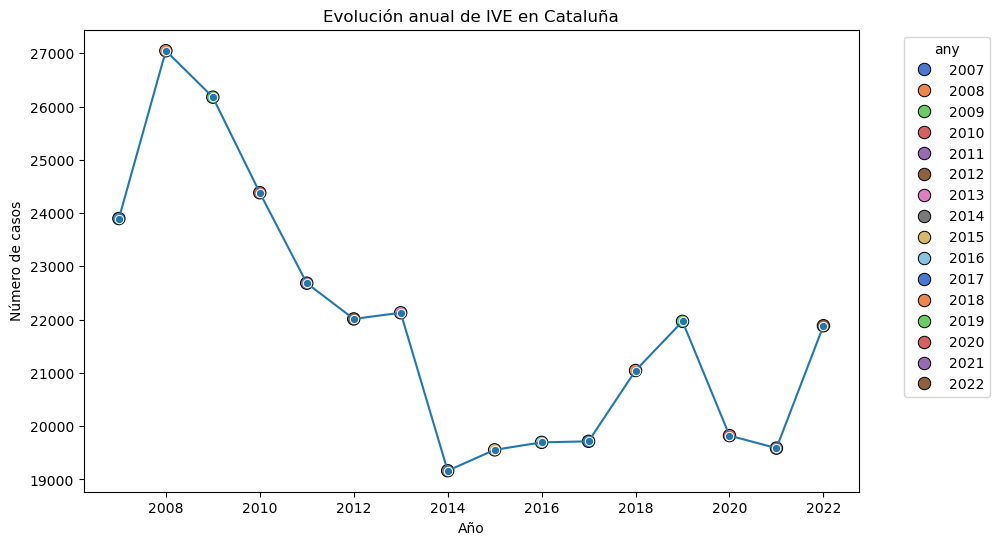

In [899]:
plt.figure(figsize=(10,6))

anual=df_ive_cat.groupby('any')['nombre de casos'].sum().reset_index()

sns.lineplot(data=anual, x='any', y='nombre de casos',marker='o')

sns.scatterplot(
    data=anual,
    x='any', y='nombre de casos',
    hue='any',
    palette=year_colors,
    s=80, edgecolor='black'
)
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title='any', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Evolución anual de IVE en Cataluña')
plt.show()

Distribución por comarca en un año concreto (ej. 2022)

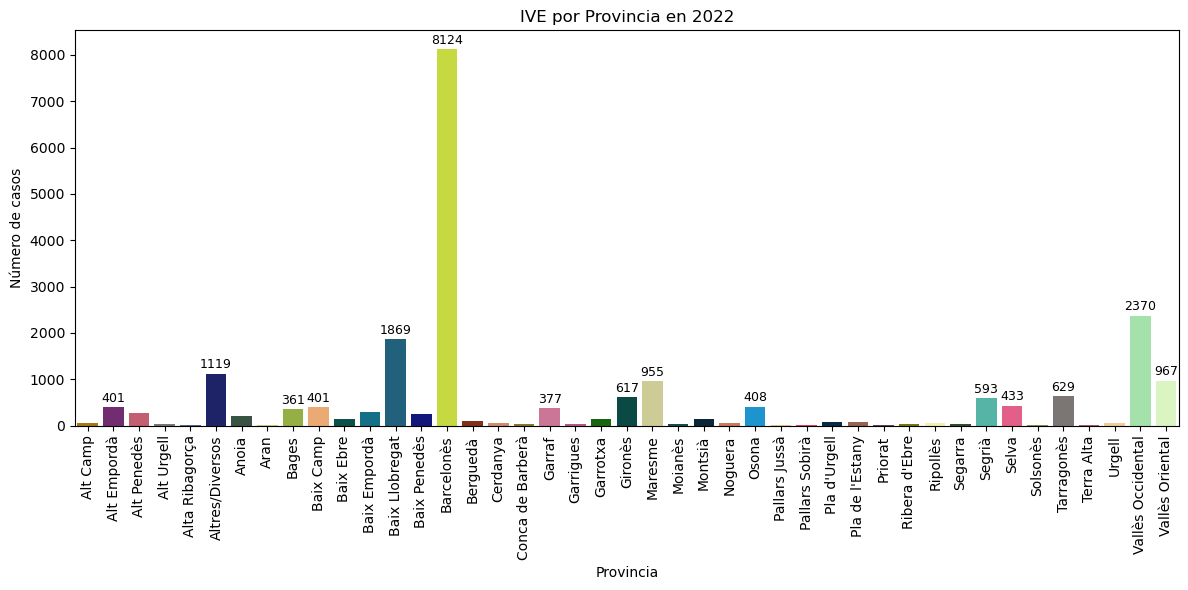

In [900]:
c_comarca = df_ive_cat[df_ive_cat['any']==2022].groupby('comarca')['nombre de casos'].sum().reset_index()
plt.figure(figsize=(12,6))
ax = sns.barplot(data=c_comarca,
            x='comarca', y='nombre de casos', hue="comarca",palette=comarca_colors)
plt.xticks(rotation=90)
plt.xlabel("Provincia")
plt.ylabel("Número de casos")
plt.title('IVE por Provincia en 2022')

for p in ax.patches:
    value = int(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    if value > 300:
        ax.text(x, y + 50, str(value), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Métodos más usados por año

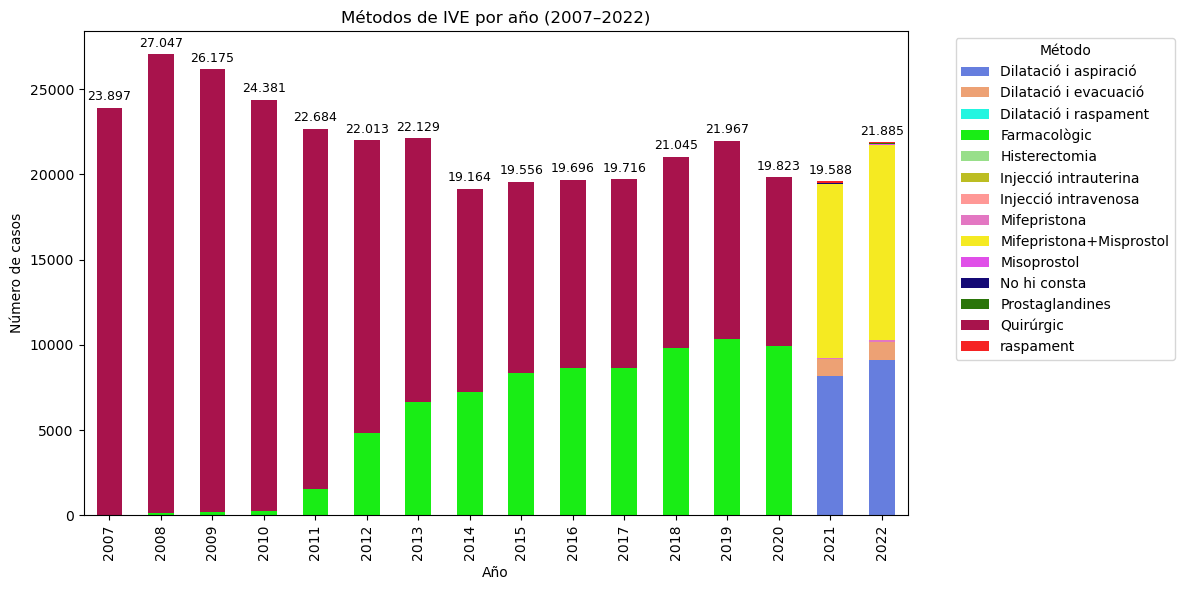

In [901]:
# Tabla año x método
df_year_method = df_ive_cat.groupby(['any','mètode'])['nombre de casos'].sum().unstack().fillna(0)

ax = df_year_method.plot(kind='bar', stacked=True, figsize=(12,6), color=method_colors)
ax.set_title('Métodos de IVE por año (2007–2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Número de casos')

totales_por_año = df_year_method.sum(axis=1)
for i, total in enumerate(totales_por_año):
    ax.text(i, total + max(totales_por_año)*0.01, f"{int(total):,}".replace(',', '.'), ha='center', va='bottom', fontsize=9)


# Leyenda a la derecha
plt.legend(title='Método', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

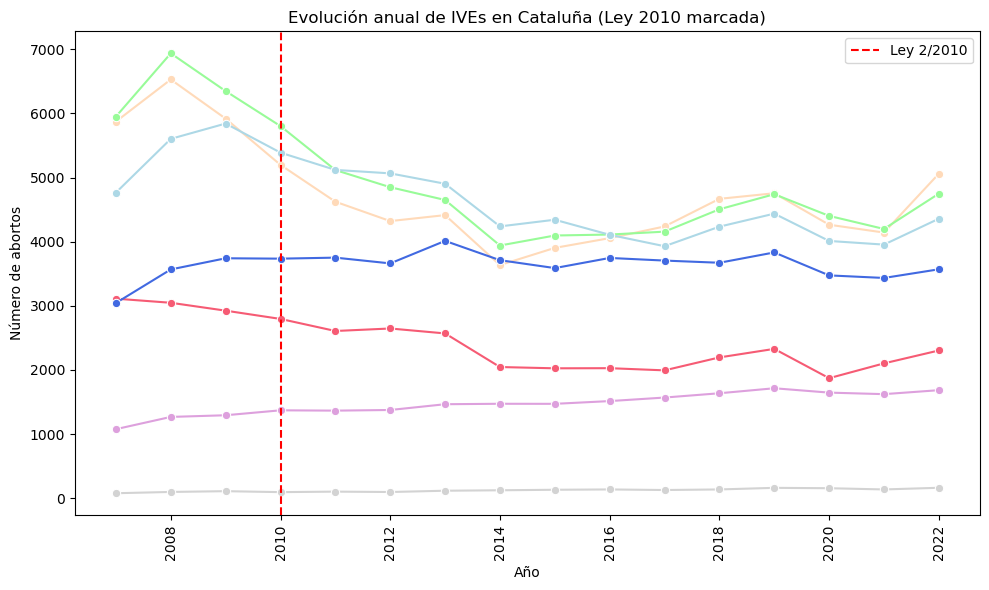

In [902]:
plt.figure(figsize=(10,6))
data = df_ive_cat.groupby(['any','grup d\'edat'])['nombre de casos'].sum().reset_index()

sns.lineplot(
    data=data,
    x='any', y='nombre de casos',
    hue='grup d\'edat',
    palette=age_colors,
    marker='o',
    legend=False
)
plt.axvline(x=2010, color='red', linestyle='--', label='Ley 2/2010')

plt.title('Evolución anual de IVEs en Cataluña (Ley 2010 marcada)')
plt.xlabel('Año'); plt.ylabel('Número de abortos')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 Evolución por grupo de edad

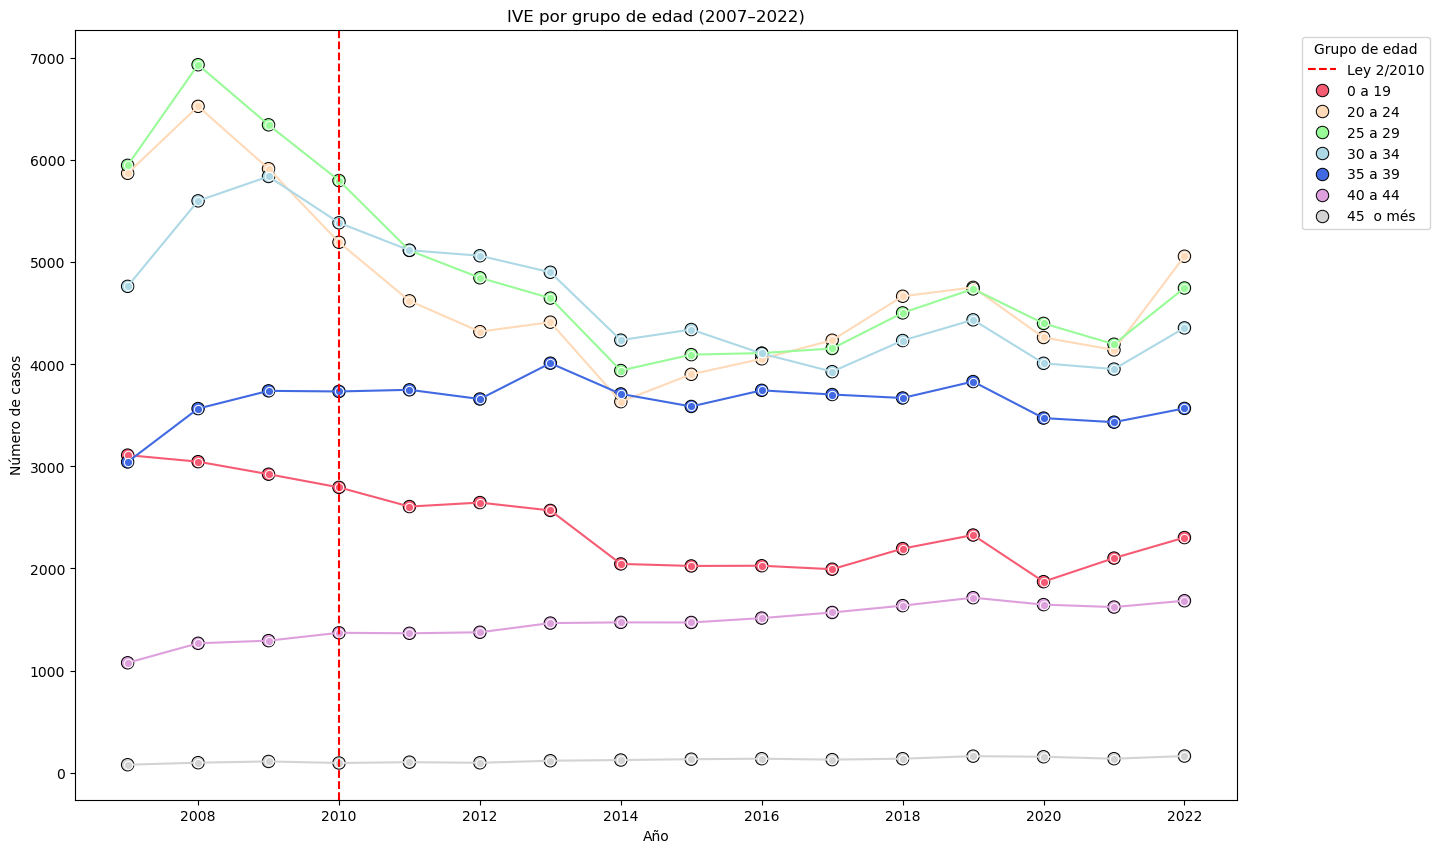

In [903]:
plt.figure(figsize=(15,10))

data = df_ive_cat.groupby(['any','grup d\'edat'])['nombre de casos'].sum().reset_index()

sns.lineplot(
    data=data,
    x='any', y='nombre de casos',
    hue='grup d\'edat',
    palette=age_colors,
    marker='o',
    legend=False
)
plt.axvline(x=2010, color='red', linestyle='--', label='Ley 2/2010')
sns.scatterplot(
    data=data,
    x='any', y='nombre de casos',
    hue='grup d\'edat',
    palette=age_colors,
    s=80, edgecolor='black'
)

plt.title('IVE por grupo de edad (2007–2022)')
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title='Grupo de edad', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


#Evolución por estado civil a lo largo de los años / Abortos por estado civil por año

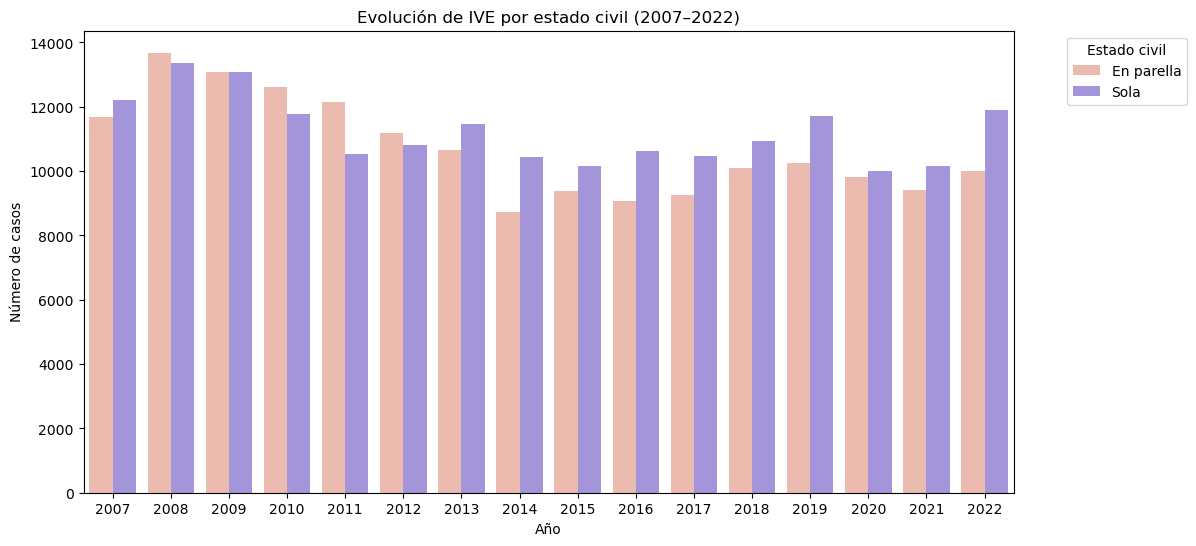

In [904]:
#Evolución por estado civil a lo largo de los años / Abortos por estado civil por año
plt.figure(figsize=(12,6))

df_civil = df_ive_cat.groupby(['any','estat civil'])['nombre de casos'].sum().reset_index()

sns.barplot(
    data=df_civil,
    x='any', y='nombre de casos',
    hue='estat civil',
    palette=civil_colors
)

plt.title('Evolución de IVE por estado civil (2007–2022)')
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title='Estado civil', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


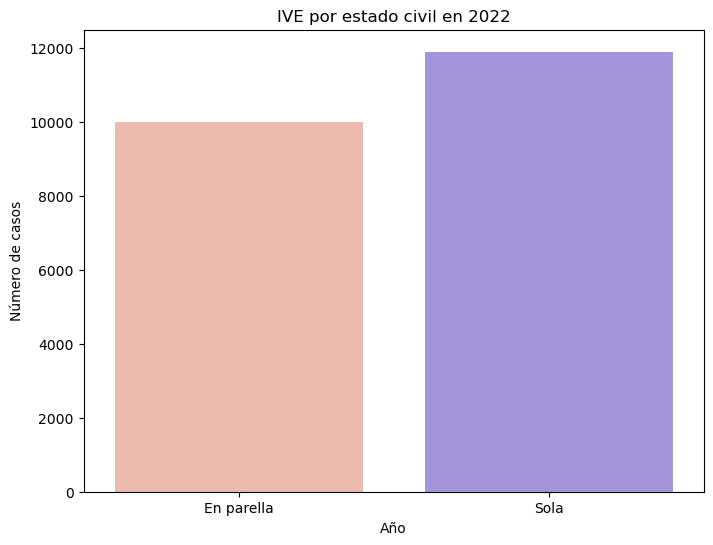

In [905]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_ive_cat[df_ive_cat['any']==2022].groupby('estat civil')['nombre de casos'].sum().reset_index(),
            x='estat civil', y='nombre de casos',    hue='estat civil',palette=civil_colors
)

plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.title('IVE por estado civil en 2022')
plt.show()


Mujeres con hijos vivos pero no a cargo

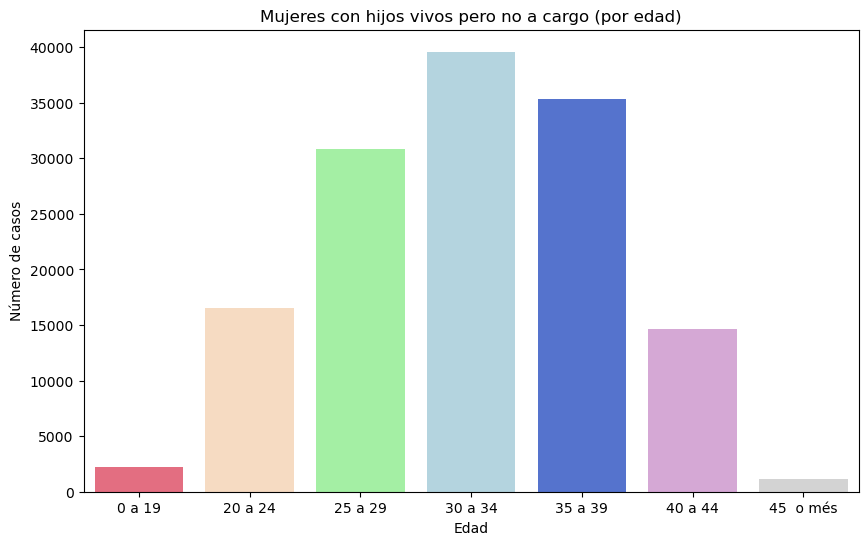

In [906]:
plt.figure(figsize=(10,6))
subset = df_ive_cat[(df_ive_cat['fills vius']=='Amb fills vius') & (df_ive_cat['fills a càrrec']=='Sense fills')]
sns.barplot(data=subset.groupby('grup d\'edat')['nombre de casos'].sum().reset_index(),
            x='grup d\'edat', y='nombre de casos', hue='grup d\'edat', palette=age_colors)

plt.xlabel("Edad")
plt.ylabel("Número de casos")
plt.title('Mujeres con hijos vivos pero no a cargo (por edad)')
plt.show()


/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_24868/2009456976.py:2: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  sns.lineplot(data=df_ive_cat.groupby(['any','fills a càrrec'])['nombre de casos'].sum().reset_index(),


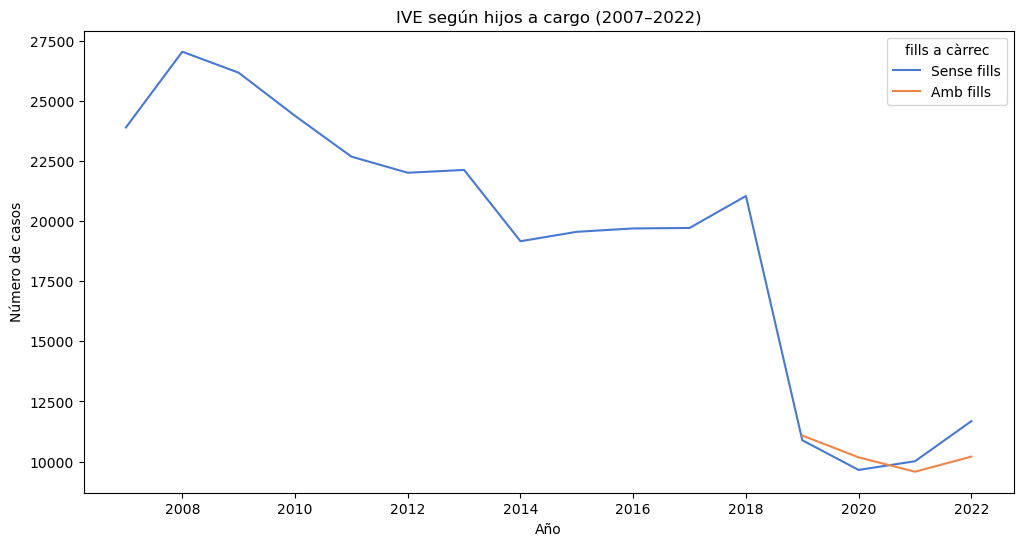

In [907]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','fills a càrrec'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='fills a càrrec',palette=year_colors)


plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.title('IVE según hijos a cargo (2007–2022)')
plt.show()

Las nacionalidades en todo el periodo

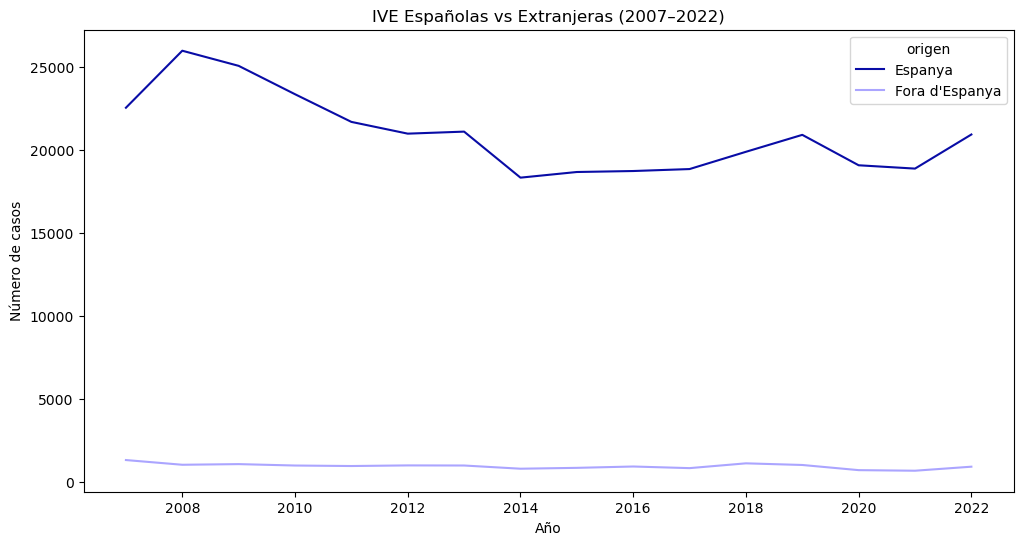

In [908]:
df_ive_cat['origen'] = df_ive_cat['residència'].apply(lambda x: 'Espanya' if x=='Espanya' else "Fora d'Espanya")
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','origen'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='origen', palette=nac_colors)
plt.title('IVE Españolas vs Extranjeras (2007–2022)')
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.show()

Españolas vs extranjeras por año

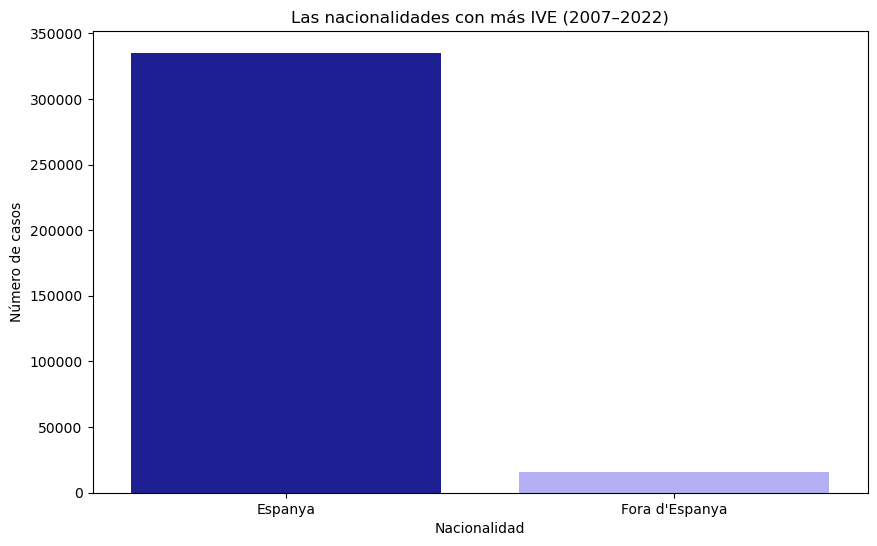

In [909]:
top_nac = df_ive_cat.groupby('residència')['nombre de casos'].sum().index#.nlargest(5).index
plt.figure(figsize=(10,6))
sns.barplot(data=df_ive_cat[df_ive_cat['residència'].isin(top_nac)].groupby('residència')['nombre de casos'].sum().reset_index(),
            x='residència', y='nombre de casos', hue="residència", palette=nac_colors)
plt.title('Las nacionalidades con más IVE (2007–2022)')
plt.xlabel("Nacionalidad")
plt.ylabel("Número de casos")
plt.show()

Situación laboral por grupo de edad

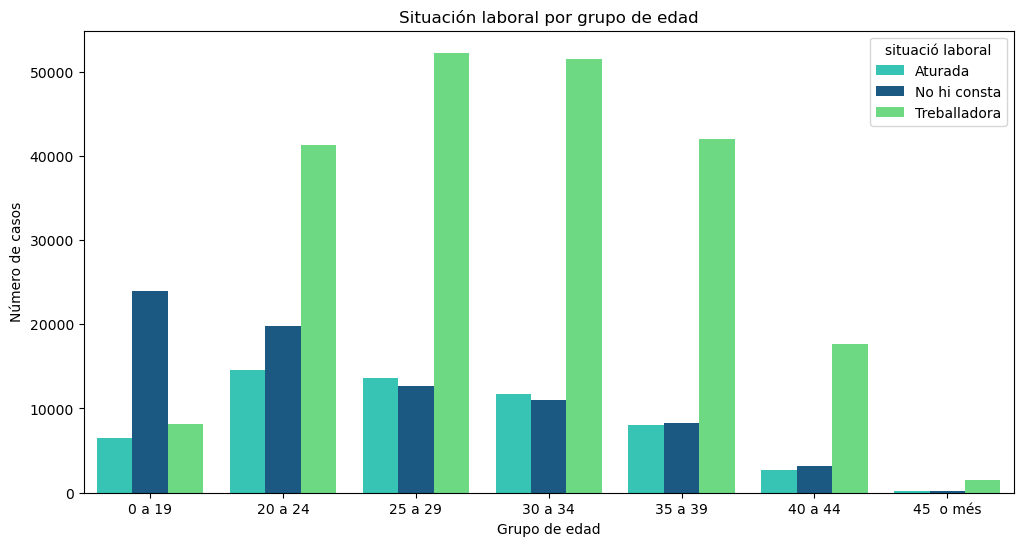

In [910]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_ive_cat.groupby(['grup d\'edat','situació laboral'])['nombre de casos'].sum().reset_index(),
            x='grup d\'edat', y='nombre de casos', hue='situació laboral', palette=labor_colors)

plt.title('Situación laboral por grupo de edad')
plt.xlabel("Grupo de edad")
plt.ylabel("Número de casos")
plt.show()

Evolución por situación laboral

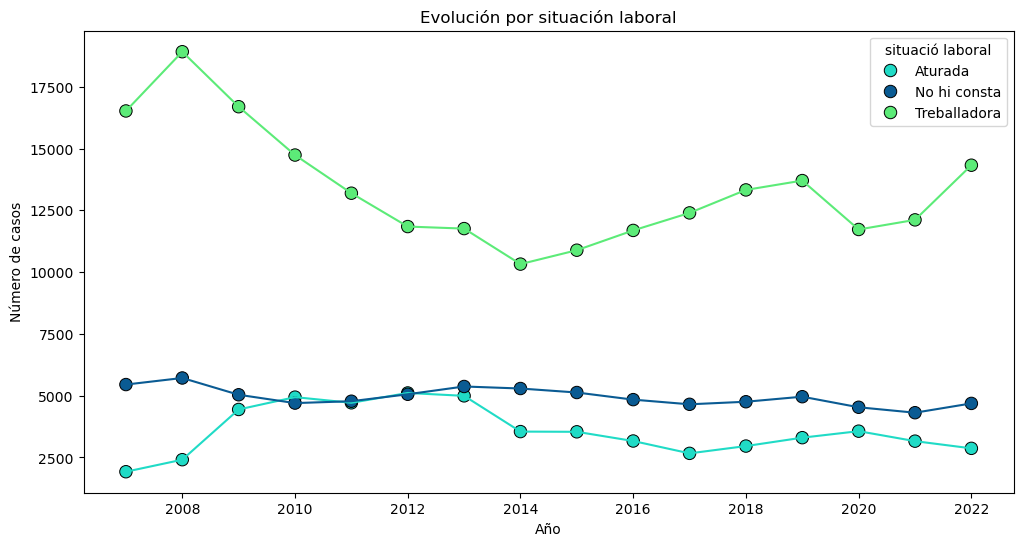

In [911]:
laboral = df_ive_cat.groupby(['any','situació laboral'])['nombre de casos'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=laboral, x='any', y='nombre de casos', hue='situació laboral', palette=labor_colors, legend=False)

sns.scatterplot(
    data=laboral,
    x='any', y='nombre de casos',
    hue="situació laboral",
    palette=labor_colors,
    s=80, edgecolor='black'
)

plt.title('Evolución por situación laboral')
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.show()

Situación laboral y pareja

<Axes: xlabel='estat civil', ylabel='situació laboral'>

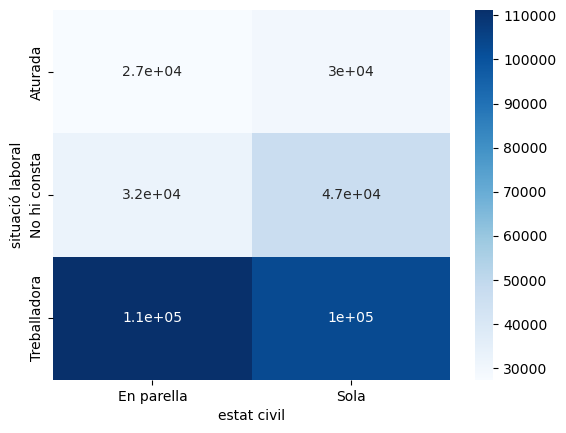

In [912]:
sns.heatmap(df_ive_cat.pivot_table(values='nombre de casos', index='situació laboral',
                                    columns='estat civil', aggfunc='sum'), cmap="Blues", annot=True)


# Datasets de df_abortos

In [913]:
t5["origen"] = "metodo"
t6["origen"] = "edad"
t7["origen"] = "motivo"
t8["origen"] = "gestacion"

In [914]:
df_abortos = pd.concat([t5, t6, t7, t8], ignore_index=True)

In [915]:
df_abortos = df_abortos.drop(['Tipo territorio', 'Código territorio', 'Territorio', 'Unidad', 'Estado dato'], axis=1)

In [916]:
df_abortos = df_abortos.rename(columns={'Valor': 'Total'})

In [917]:
def limpiar_concepto_abortos(df):
    reemplazos = {
        'Abortos voluntarios de mujeres residentes realizados por el método de ': '',
        'Abortos voluntarios de mujeres residentes realizados por otros métodos / ': '',
        'Abortos voluntarios de mujeres residentes entre ': '',
        'Abortos voluntarios de mujeres residentes de ' : '',
        'Abortos voluntarios de mujeres residentes menores de ' : '<',
        'Abortos voluntarios de mujeres residentes a ' : '',
        'Abortos voluntarios de mujeres residentes por ' : '',
    }
    
    for buscar, nuevo in reemplazos.items():
        df["Concepto"] = df["Concepto"].str.replace(buscar, nuevo, regex=False)
    
    df["Concepto"] = df["Concepto"].str.strip()
    return df

df_abortos = limpiar_concepto_abortos(df_abortos)
df_abortos["Concepto"]

0              dilatación y evacuación
1                         mifepristona
2              dilatación y aspiración
3                      prostaglandinas
4                            no consta
                     ...              
1274      11 y 12 semanas de gestación
1275       9 y 12 semanas de gestación
1276      13 y 15 semanas de gestación
1277      13 y 16 semanas de gestación
1278    8 o menos semanas de gestación
Name: Concepto, Length: 1279, dtype: object

In [918]:
df_abortos["Concepto"] = (
    df_abortos["Concepto"]
    .str.replace("años", "", regex=False)
    .str.replace("riesgo de graves anomalías del feto", "riesgo fetal", regex=False)
    .str.replace("grave riesgo para la vida o salud de la embarazada", "salud materna", regex=False)
    .str.replace("riesgo de graves anomalías del feto", "riesgo fetal", regex=False)
    .str.replace("anomalías fetales incompatibles con la vida o enfermedad extremadamente grave e incurable", "riesgo fetal", regex=False)
    .str.replace("los que no constan los motivos" , "motivos varios", regex=False)
    .str.replace('semanas de gestación', '', regex=False)
    .str.replace('semanas', '', regex=False)
    .str.replace(' de gestación', '', regex=False)
    .str.replace('los que no consta las', 'no consta', regex=False)
    .str.strip()
)

In [919]:
df_abortos["Total"] = df_abortos["Total"].replace(["-", " ", "", "s/d", "na"], None)
df_abortos["Total"] = pd.to_numeric(df_abortos["Total"])
#df_abortos.loc[~df_abortos["Total"].apply(lambda x: isinstance(x, (int, float))), "Total"].unique()

df_abortos["Total"] = pd.to_numeric(df_abortos["Total"], errors="coerce")
df_abortos["Total"] = df_abortos["Total"].astype("Int64")  # enteros con soporte NaN

df_abortos["Total"] = df_abortos["Total"].fillna(0).astype(int)



df_abortos['Total'] = df_abortos['Total'].replace(0, np.nan)
df_abortos = df_abortos.dropna(subset=['Total'])
df_abortos["Total"].unique()

array([3.7280e+03, 4.2400e+02, 1.6231e+04, 3.0400e+02, 7.6000e+01,
       1.7666e+04, 1.6470e+03, 1.2300e+02, 3.5600e+02, 4.2100e+02,
       1.6600e+02, 3.8000e+02, 1.4619e+04, 3.7400e+02, 4.2070e+03,
       3.7210e+03, 1.5000e+02, 1.2185e+04, 3.2100e+02, 1.7300e+02,
       1.1405e+04, 2.2700e+02, 4.1000e+03, 2.6500e+02, 1.5300e+02,
       3.9280e+03, 1.4300e+02, 3.6900e+02, 2.4100e+02, 1.1312e+04,
       1.1900e+02, 3.5400e+02, 3.3200e+02, 1.1596e+04, 4.3120e+03,
       1.1200e+02, 4.3320e+03, 1.1345e+04, 2.5700e+02, 2.9500e+02,
       1.1548e+04, 3.2900e+02, 4.5220e+03, 3.2500e+02, 1.3400e+02,
       2.2600e+02, 3.1800e+03, 1.9000e+02, 1.0546e+04, 3.8640e+03,
       2.0000e+00, 1.0597e+04, 2.4400e+02, 4.9200e+02, 1.1230e+04,
       7.0000e+00, 4.8000e+02, 4.5350e+03, 3.4600e+02, 1.2066e+04,
       4.7150e+03, 3.4200e+02, 1.3000e+01, 8.0100e+02, 3.5700e+02,
       7.9000e+02, 4.4800e+03, 1.2605e+04, 1.0000e+01, 1.4800e+02,
       5.3790e+03, 9.4100e+02, 7.0630e+03, 9.3600e+02, 1.5920e

In [920]:
df_metodo     = df_abortos[df_abortos["origen"] == "metodo"].copy()
df_edad       = df_abortos[df_abortos["origen"] == "edad"].copy()
df_motivo     = df_abortos[df_abortos["origen"] == "motivo"].copy()
df_gestacion  = df_abortos[df_abortos["origen"] == "gestacion"].copy()


In [921]:
df_edad = df_edad[df_edad["Concepto"] != "Total abortos voluntarios de mujeres residentes"]

empezamos....

In [922]:
df_abortos["origen"].unique()

array(['metodo', 'edad', 'motivo', 'gestacion'], dtype=object)

In [923]:
df_abortos['Concepto'].unique()

array(['dilatación y evacuación', 'mifepristona',
       'dilatación y aspiración', 'prostaglandinas', 'no consta',
       'Total abortos voluntarios de mujeres residentes', '15 y 19',
       '35 y 39', '25 y 29', '20 y 24', '30 y 34', '40 y 44', '44  y más',
       '<15', 'violación', 'salud materna', 'motivos varios',
       'riesgo fetal', 'petición de la mujer', '21  y más', '13 y 15',
       '11 y 12', '9 y 10', '8 o menos', '16 y 20', '17 y 20', '13 y 16',
       '9 y 12', '9 y  14', '15 y 22', '23 o más'], dtype=object)

In [924]:
df_abortos_temporal = df_abortos[df_abortos["Concepto"] != "Total abortos voluntarios de mujeres residentes"]

se tiene que ver las columnas que se usaran en caso de que haya altras y no se especifica juntar esas columnas porque no es relevante tener dos que al final significa lo mismo, quiero tambien ver el nombre de las columnas porque al mostrar los datos en el grafico se mostrara ese nombre y si es largo queda feo, tambien mirar cada columna que dato tiene y si se puede hacer algo con ello 
Fracàs TF + dilatació + aspiració / evacuació / raspament',

## Cifra por año y tipo de métodos y motivo 
## Causas( que influye) correlacionar de la edad de causas 
## Cuál es el método más utilizado 
## Explicar los tipos de métodos 
## Especificar 
## Las personas que trabajan y qué edades 
## Las mujeres que tienen hijo por edad y las que no pero todo por edades
## Cuáles son las que más aborta las extranjera o españolas 
## Lo de la gestación cuantos casos por gestación hay 

Evolución total de abortos por año

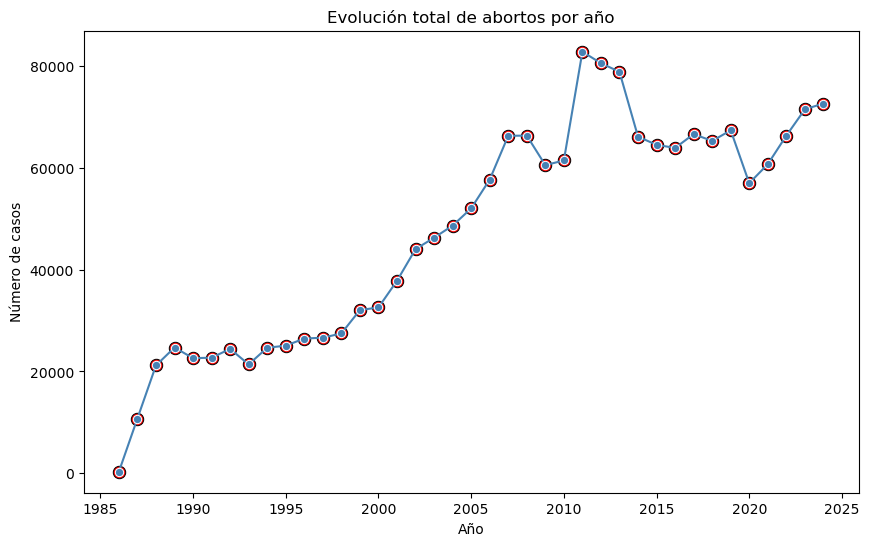

In [925]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_abortos_temporal.groupby('Año')['Total'].sum().reset_index(),
             x='Año', y='Total', color='steelblue' ,marker='o')

sns.scatterplot(
    data=df_abortos_temporal.groupby('Año')['Total'].sum().reset_index(),
    x='Año', y='Total',
    s=80, edgecolor='black', color='red'
)

plt.title('Evolución total de abortos por año')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.show()


In [926]:
df = df_abortos_temporal[(df_abortos_temporal['Año'] >= 2008) & (df_abortos_temporal['Año'] <= 2022)].copy()

 Desglose por origen

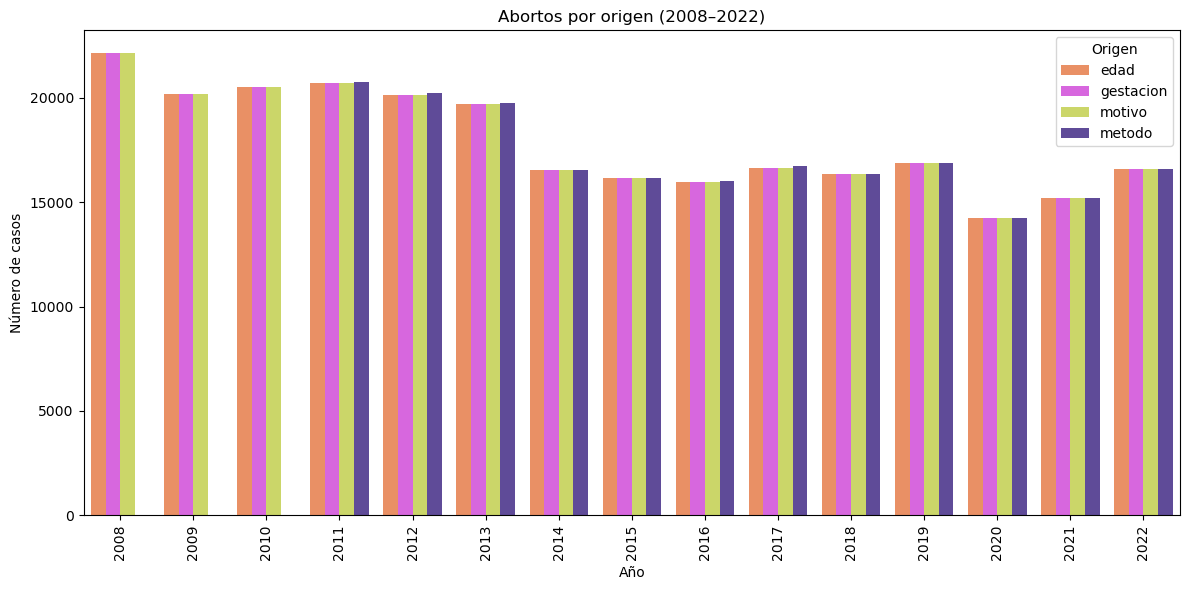

In [927]:

plt.figure(figsize=(12,6))

sns.barplot(
    data=df.groupby(['Año','origen'])['Total'].sum().reset_index(),
    x='Año', y='Total',
    hue='origen',
    palette=origen_colors
)

plt.title('Abortos por origen (2008–2022)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Origen')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Zoom en cada origen

In [928]:
print(df_edad[['Año','Concepto','Total']].tail(10))
print(df_motivo[['Año','Concepto','Total']].tail(10))


      Año   Concepto   Total
409  2023    35 y 39  2674.0
411  2023    15 y 19  1670.0
412  2024        <15    34.0
413  2024    35 y 39  2702.0
414  2024    20 y 24  4425.0
415  2024    25 y 29  4235.0
417  2024    15 y 19  1759.0
418  2024    30 y 34  3575.0
419  2024  44  y más   125.0
420  2024    40 y 44  1294.0
      Año              Concepto    Total
751  2022         salud materna   1978.0
752  2022  petición de la mujer  14108.0
757  2023         salud materna    889.0
758  2023          riesgo fetal    471.0
760  2023  petición de la mujer  16494.0
761  2023          riesgo fetal     16.0
764  2024  petición de la mujer  17113.0
767  2024          riesgo fetal     18.0
770  2024          riesgo fetal    455.0
771  2024         salud materna    563.0


Conexiones internas (ejemplo)

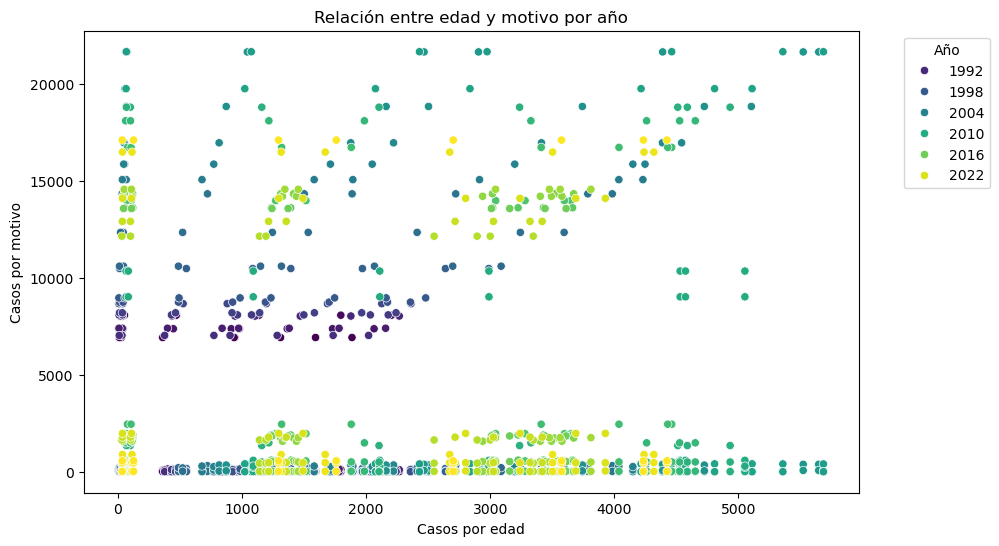

In [929]:
edad_motivo = pd.merge(
    df_edad[['Año','Concepto','Total']],
    df_motivo[['Año','Concepto','Total']],
    on='Año', suffixes=('_edad','_motivo')
)

plt.figure(figsize=(10,6))
sns.scatterplot(data=edad_motivo, x='Total_edad', y='Total_motivo', hue='Año', palette='viridis')
plt.title('Relación entre edad y motivo por año')
plt.xlabel('Casos por edad'); plt.ylabel('Casos por motivo')
plt.legend(title="Año", bbox_to_anchor=(1.05, 1))
plt.show()

Evolucion por Origen 

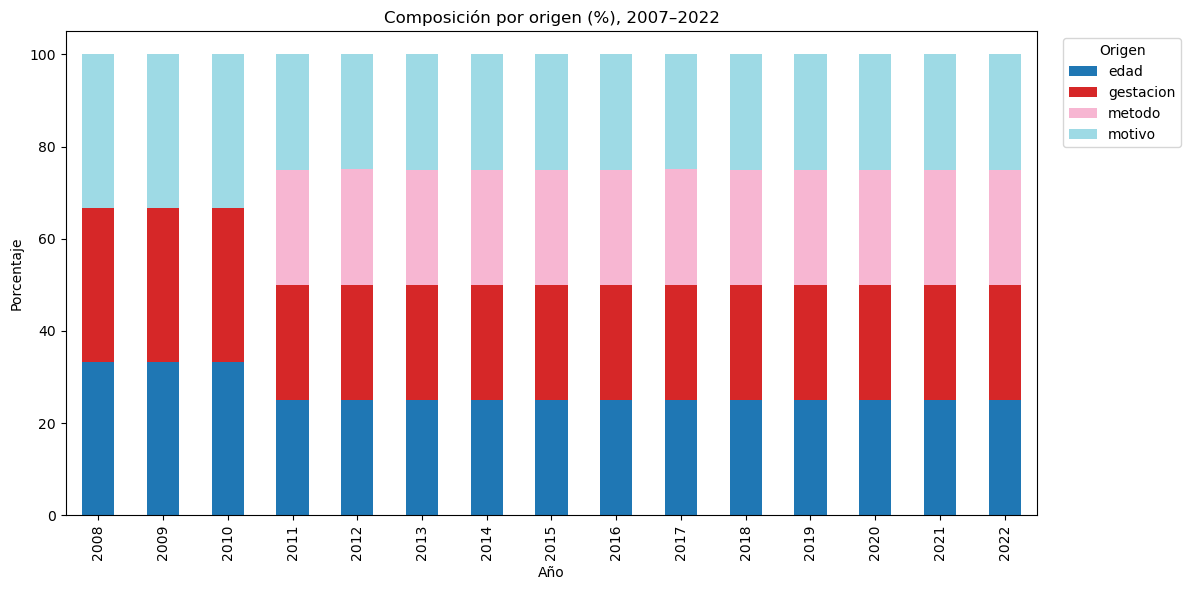

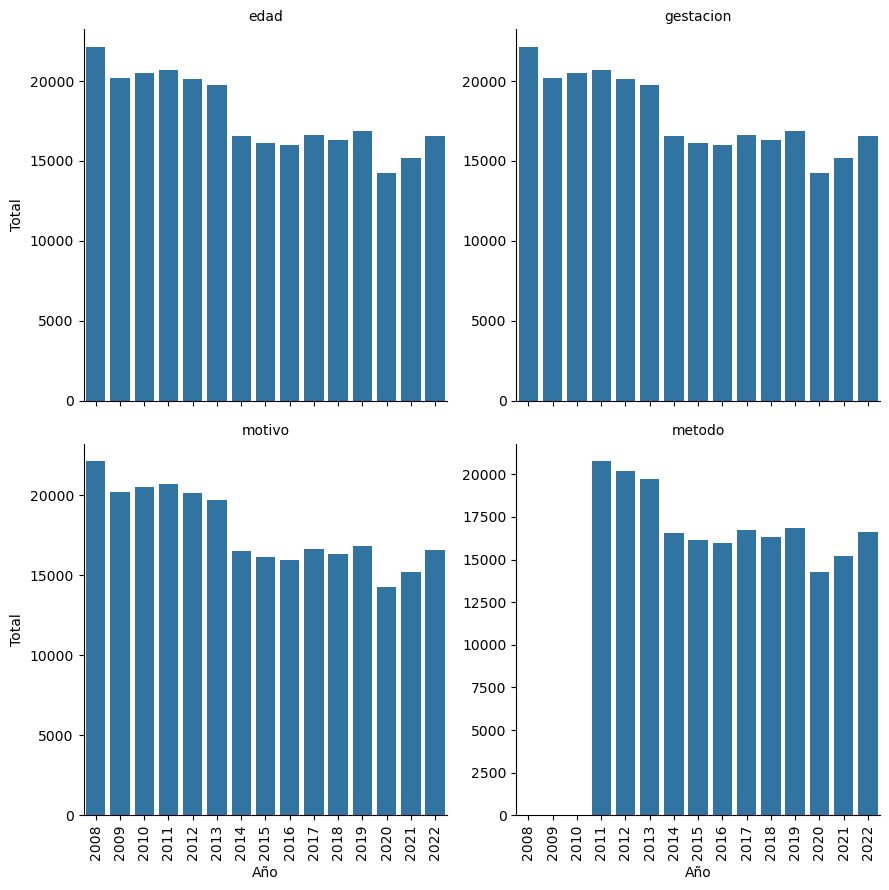

In [930]:
# 1) Barras apiladas en porcentaje por año y origen
pivot = df.groupby(['Año','origen'])['Total'].sum().unstack().fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

ax = pivot_pct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
ax.set_title('Composición por origen (%), 2007–2022')
ax.set_xlabel('Año'); ax.set_ylabel('Porcentaje')
ax.legend(title='Origen', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout(); plt.show()

# 2) Facetas: una subgráfica por origen (reduce solapamiento)
g = sns.FacetGrid(
    df.groupby(['Año','origen'])['Total'].sum().reset_index(),
    col='origen', col_wrap=2, height=4.5, sharey=False
)
g.map_dataframe(sns.barplot, x='Año', y='Total', color='#1f77b4')
g.set_titles('{col_name}'); g.set_axis_labels('Año','Total')

for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)


plt.tight_layout(); plt.show()

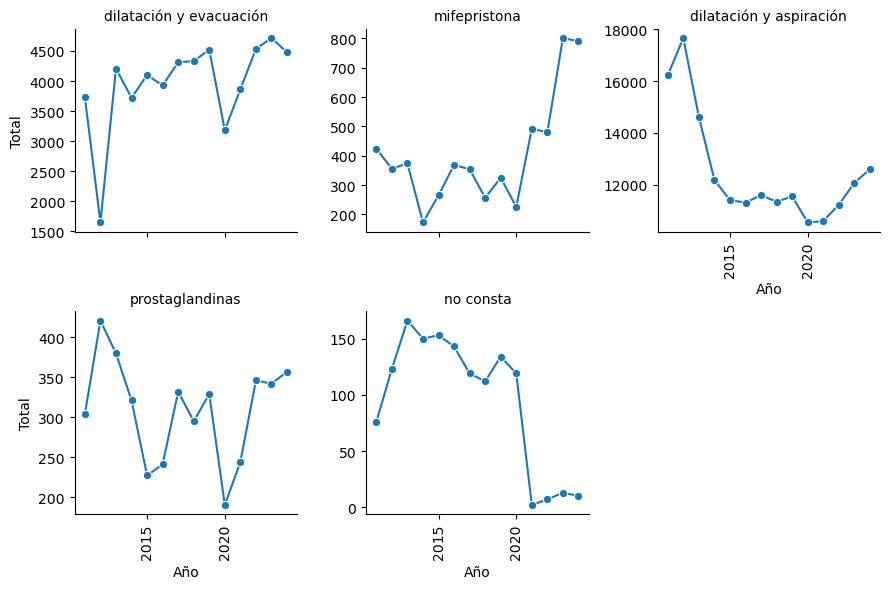

In [931]:
df_metodo_filtrado = df_metodo[df_metodo['Año'] >= 2010]

g = sns.FacetGrid(df_metodo_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')

# Rotar etiquetas de los años para que se lean bien
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

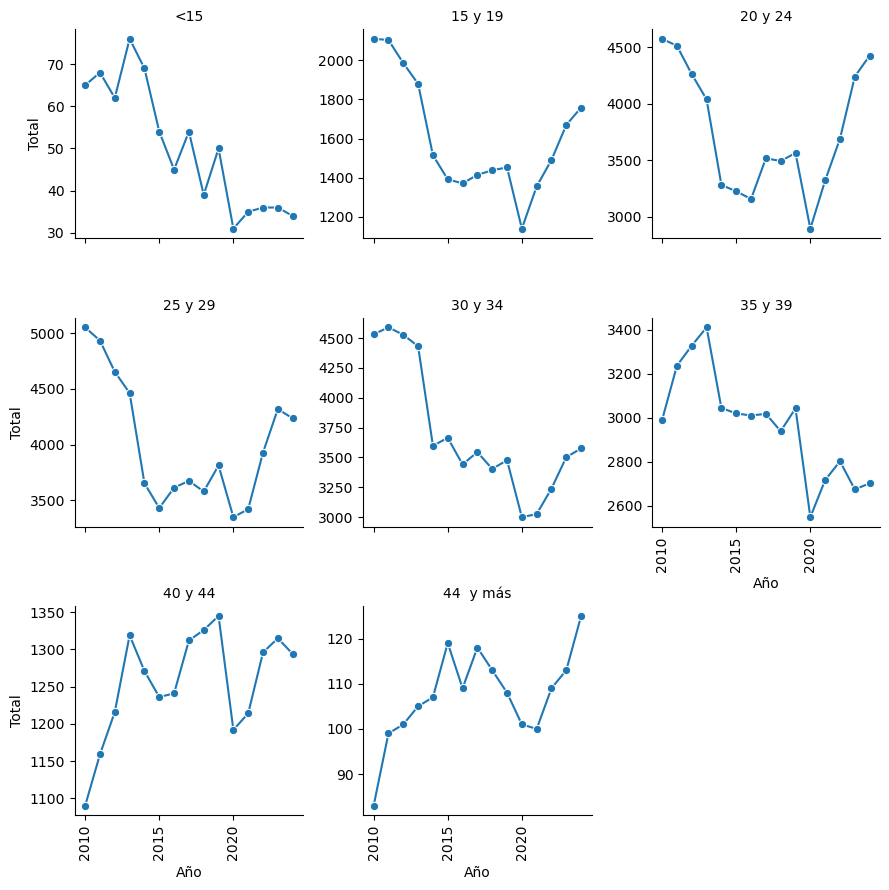

In [932]:

# Función para extraer el número inicial del grupo de edad
def edad_key(x):
    # Extrae el primer número que encuentre
    m = re.search(r'\d+', str(x))
    return int(m.group()) if m else -1   # Para "<15" devuelve -1

# Filtrar desde 2010
df_edad_filtrado = df_edad[df_edad['Año'] >= 2010].copy()

# Orden automático de categorías
orden_automatico = sorted(df_edad_filtrado['Concepto'].unique(), key=edad_key)

# Convertir Concepto en categoría ordenada
df_edad_filtrado['Concepto'] = pd.Categorical(
    df_edad_filtrado['Concepto'],
    categories=orden_automatico,
    ordered=True
)

# FacetGrid ordenado automáticamente
g = sns.FacetGrid(
    df_edad_filtrado,
    col='Concepto',
    col_wrap=3,
    height=3,
    sharey=False
)

g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')

for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [933]:
df_motivo["Concepto"].unique()

array(['violación', 'salud materna', 'motivos varios', 'riesgo fetal',
       'petición de la mujer'], dtype=object)

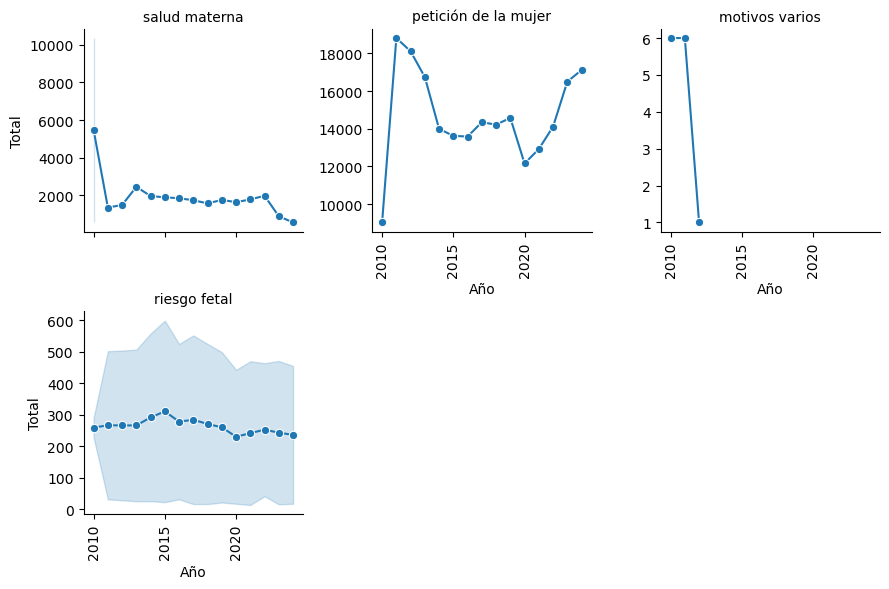

In [934]:
# Motivo
df_motivo_filtrado = df_motivo[df_motivo['Año'] >= 2010]
g = sns.FacetGrid(df_motivo_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout(); plt.show()


In [941]:
df_motivo[df_motivo["Concepto"]== "riesgo fetal"].head()

,Año,Concepto,Total,origen
429,1986,riesgo fetal,8.0,motivo
437,1987,riesgo fetal,75.0,motivo
439,1988,riesgo fetal,85.0,motivo
455,1989,riesgo fetal,117.0,motivo
462,1990,riesgo fetal,143.0,motivo


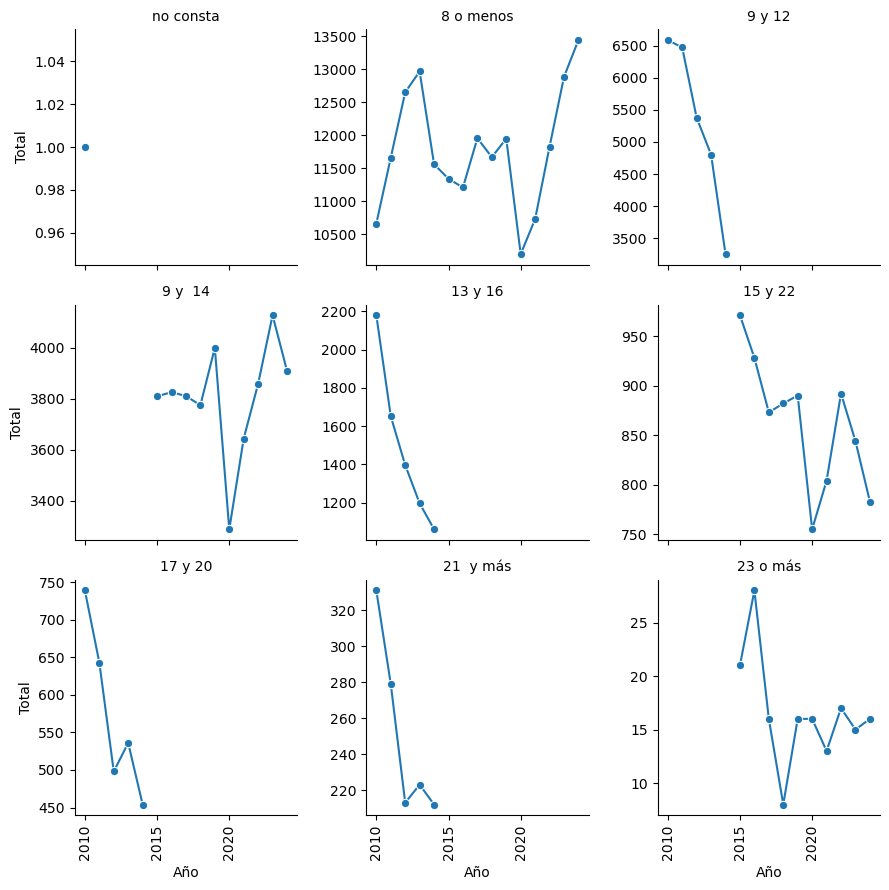

In [942]:

# Función para extraer el primer número de la categoría de gestación
def gestacion_key(x):
    m = re.search(r'\d+', str(x))
    return int(m.group()) if m else -1   # Para categorías como "≥23" o "<8"

# Filtrar desde 2010
df_gestacion_filtrado = df_gestacion[df_gestacion['Año'] >= 2010].copy()

# Orden automático de categorías según el primer número encontrado
orden_gestacion = sorted(df_gestacion_filtrado['Concepto'].unique(), key=gestacion_key)

# Convertir Concepto en categoría ordenada
df_gestacion_filtrado['Concepto'] = pd.Categorical(
    df_gestacion_filtrado['Concepto'],
    categories=orden_gestacion,
    ordered=True
)

# Crear FacetGrid ordenado
g = sns.FacetGrid(
    df_gestacion_filtrado,
    col='Concepto',
    col_wrap=3,
    height=3,
    sharey=False
)

g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')

# Rotar etiquetas del eje X
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


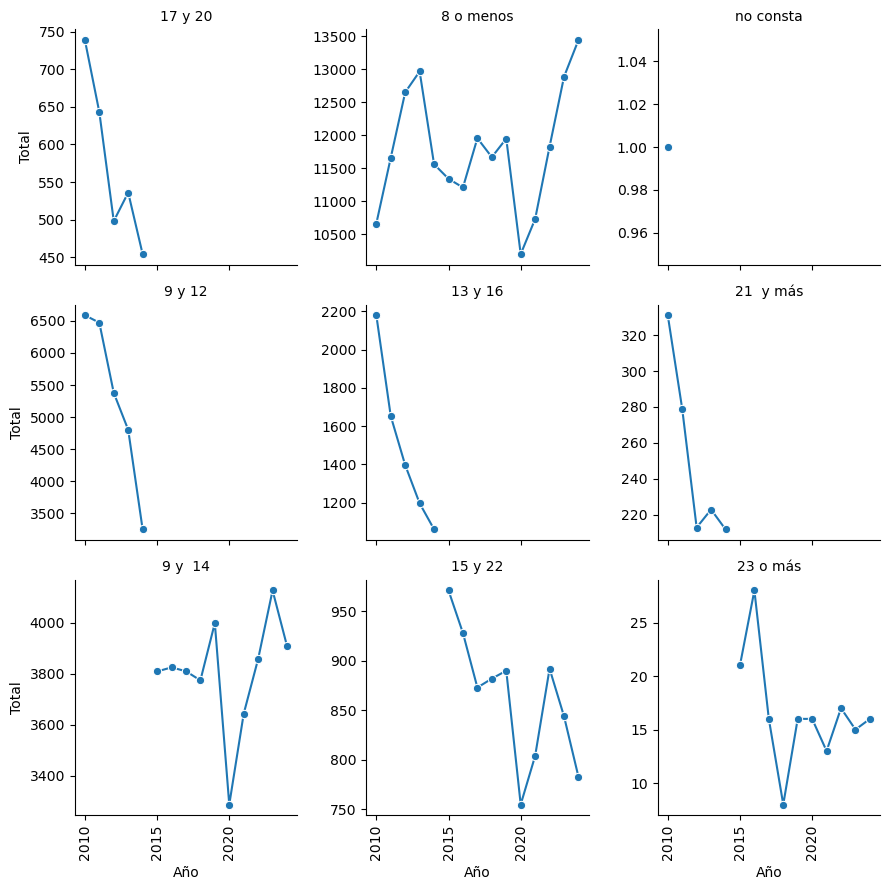

In [935]:

# Gestación
df_gestacion_filtrado = df_gestacion[df_gestacion['Año'] >= 2010]
g = sns.FacetGrid(df_gestacion_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout(); plt.show()

In [936]:
df_ive_cat.columns

Index(['any', 'centres', 'mètode', 'finançament públic', 'grup d'edat',
       'estat civil', 'fills a càrrec', 'fills vius', 'residència',
       'codi de la comarca de residència', 'comarca', 'país de naixement',
       'primera nacionalitat', 'situació laboral', 'ingressos',
       'nombre de casos', 'origen'],
      dtype='object')

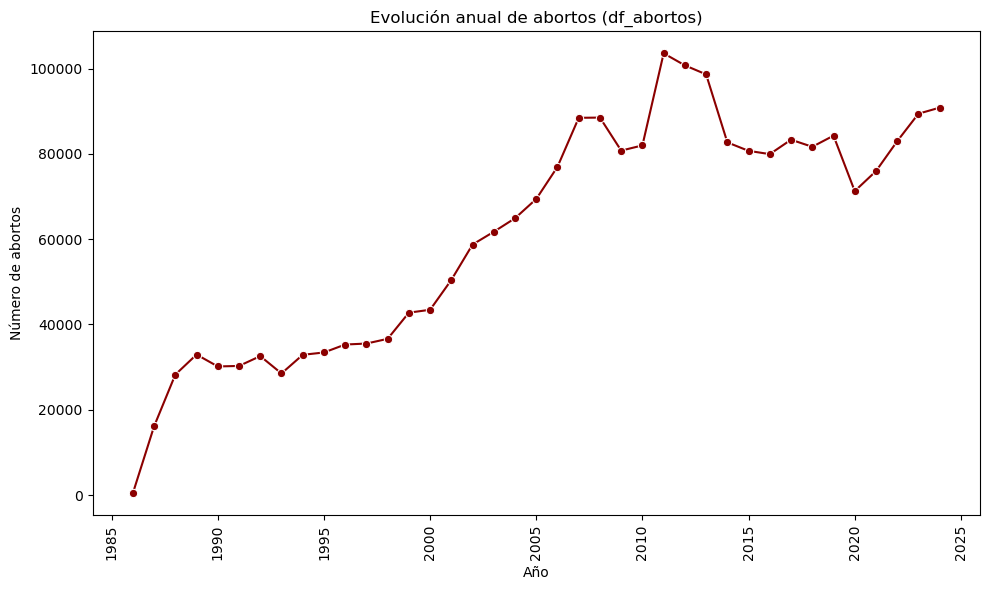

In [938]:
# Evolución anual total en df_abortos
abortos_year = df_abortos.groupby('Año')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=abortos_year, x='Año', y='Total', marker='o', color='darkred')
plt.title('Evolución anual de abortos (df_abortos)')
plt.xlabel('Año'); plt.ylabel('Número de abortos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


para comparar ambos datasets 

In [946]:
cat_year = df_ive_cat.groupby('any')['nombre de casos'].sum().reset_index()

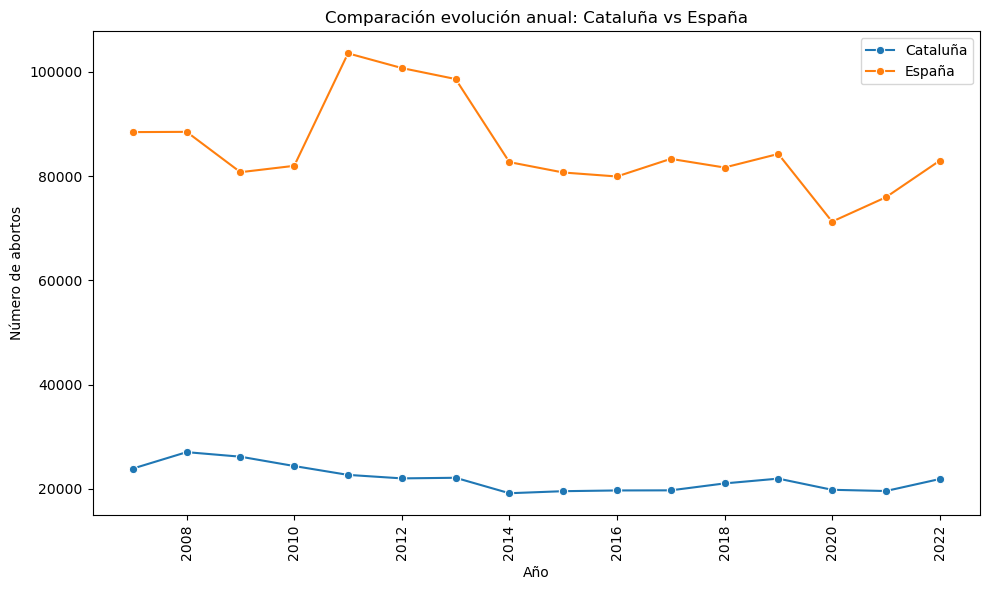

In [947]:
cat_year = cat_year.rename(columns={
    'any': 'Año',
    'nombre de casos': 'Total'
})


comp = cat_year.merge(
    abortos_year,
    on='Año',
    how='inner',
    suffixes=('_cat', '_esp')
)


plt.figure(figsize=(10,6))

sns.lineplot(data=comp, x='Año', y='Total_cat', marker='o', label='Cataluña')
sns.lineplot(data=comp, x='Año', y='Total_esp', marker='o', label='España')

plt.title('Comparación evolución anual: Cataluña vs España')
plt.xlabel('Año')
plt.ylabel('Número de abortos')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
cat_year = df_ive_cat.groupby(['any','grup d\'edat'])['nombre de casos'].sum().reset_index()

/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_24868/2509427238.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cat_year, x='periodo', y='nombre de casos', estimator='mean', ci=None, palette=['#1f77b4','#ff7f0e'])
/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_24868/2509427238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_year, x='periodo', y='nombre de casos', estimator='mean', ci=None, palette=['#1f77b4','#ff7f0e'])


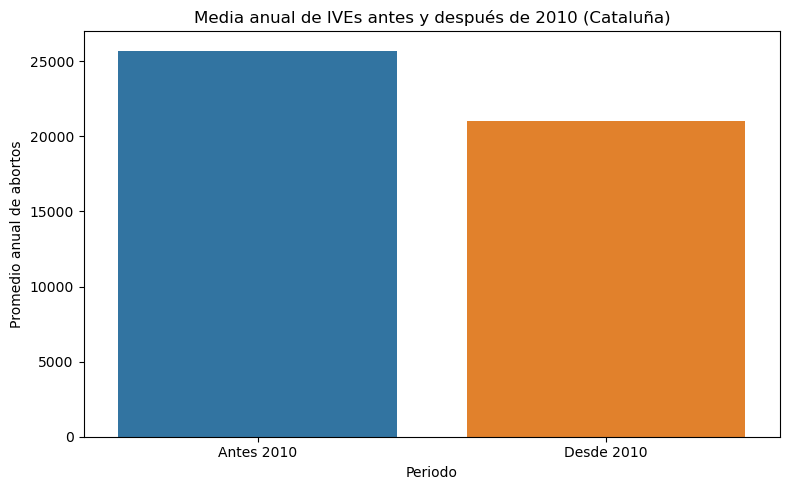

In [ ]:
cat_year['periodo'] = cat_year['any'].apply(lambda x: 'Antes 2010' if x < 2010 else 'Desde 2010')

plt.figure(figsize=(8,5))
sns.barplot(data=cat_year, x='periodo', y='nombre de casos', estimator='mean', ci=None, palette=['#1f77b4','#ff7f0e'])
plt.title('Media anual de IVEs antes y después de 2010 (Cataluña)')
plt.xlabel('Periodo'); plt.ylabel('Promedio anual de abortos')
plt.tight_layout()
plt.show()



/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_24868/682434498.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


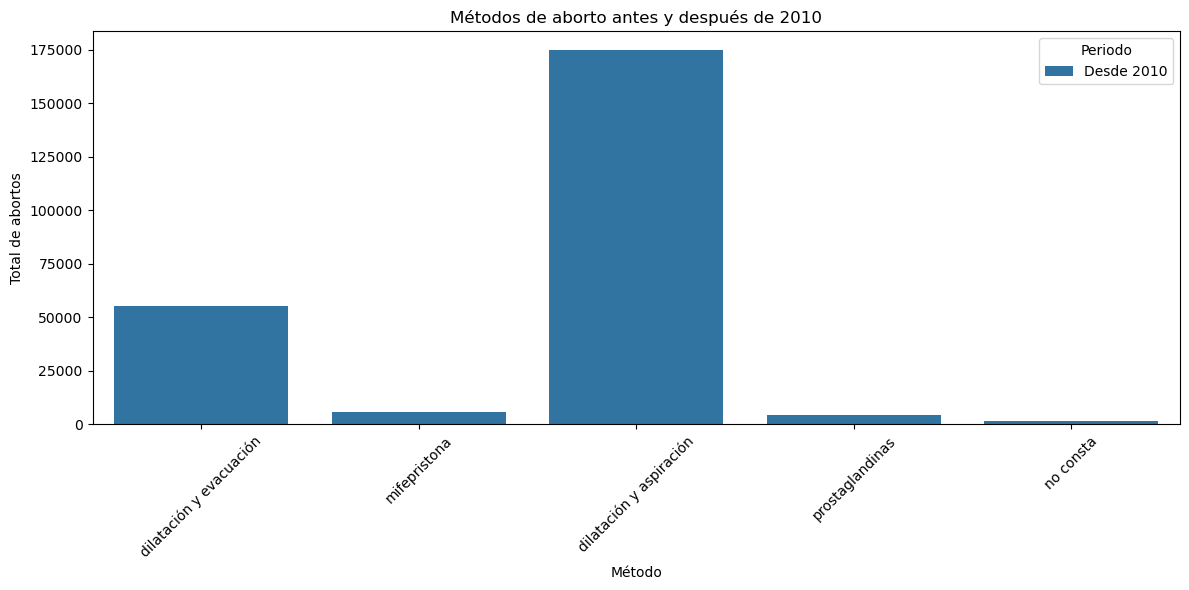

In [ ]:
df_metodo_periodo = df_metodo.copy()
df_metodo_periodo['periodo'] = df_metodo_periodo['Año'].apply(lambda x: 'Antes 2010' if x < 2010 else 'Desde 2010')

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_metodo_periodo,
    x='Concepto', y='Total', hue='periodo',
    estimator='sum', ci=None
)
plt.title('Métodos de aborto antes y después de 2010')
plt.xlabel('Método'); plt.ylabel('Total de abortos')
plt.xticks(rotation=45)
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()


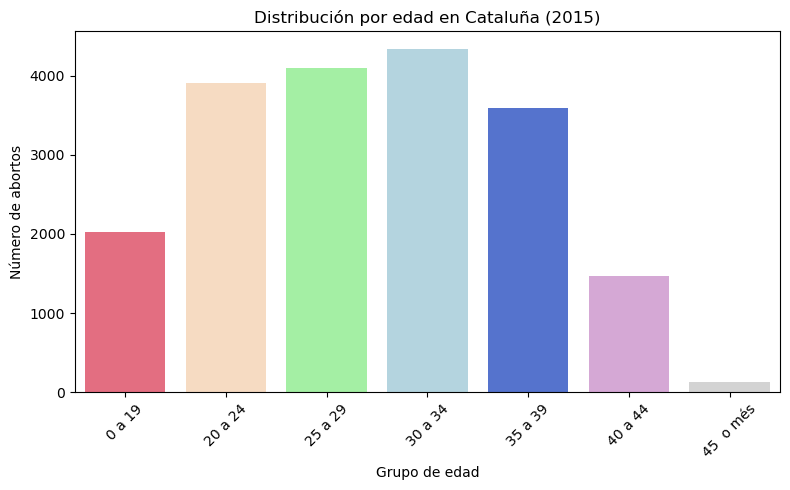

In [952]:
# Cataluña: composición por edad en un año concreto (ej. 2015)
cat_edad_2015 = df_ive_cat[df_ive_cat['any'] == 2015] \
                    .groupby("grup d'edat")['nombre de casos'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cat_edad_2015, x="grup d'edat", y='nombre de casos', hue="grup d'edat", palette=age_colors)

plt.title('Distribución por edad en Cataluña (2015)')
plt.xlabel('Grupo de edad'); plt.ylabel('Número de abortos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_24868/1693611132.py:6: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  sns.barplot(data=edad_2015, x='Concepto', y='Total', hue="Concepto", palette=year_colors)


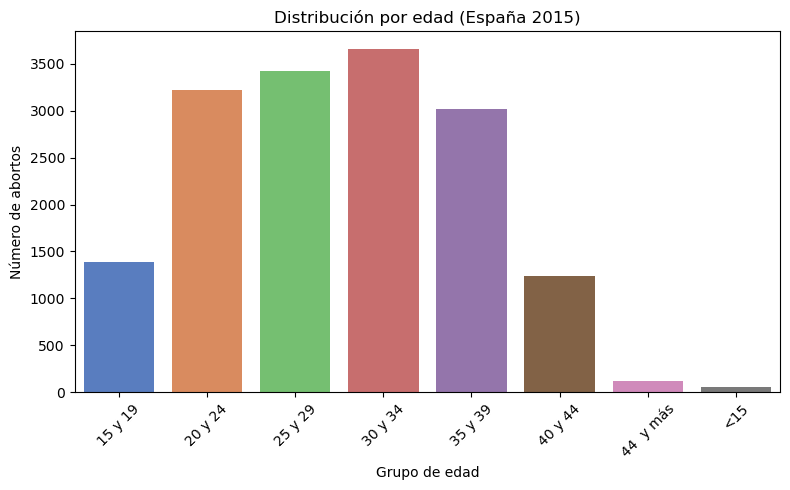

In [955]:
# df_abortos: composición por edad en el mismo año
edad_2015 = df_edad[df_edad['Año'] == 2015] \
                .groupby('Concepto')['Total'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=edad_2015, x='Concepto', y='Total', hue="Concepto", palette=year_colors)
plt.title('Distribución por edad (España 2015)')
plt.xlabel('Grupo de edad'); plt.ylabel('Número de abortos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
